In [41]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [42]:
def harmonic_shoot(y, x, beta):
    return [y[1], (x**2- beta) * y[0]]  

In [43]:
tol = 1e-4  # tolerance for eigenvalue convergence
colors = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting the eigenfunctions
L = 4  
# phi0 = [0, 0.005]  
x_range = np.linspace(-L, L, 81)  
beta_start = 0
dbeta = 0.2

In [44]:
A1 = []
A2 = []

Eigenvalue for mode 1: 0.9999999767751433 with value of x and y as (4.0, 1.000004133268477)
Eigenvalue for mode 2: 2.9999994019628504 with value of x and y as (4.0, -0.9999987367576432)
Eigenvalue for mode 3: 4.999989531433677 with value of x and y as (4.0, 0.9999948796569545)
Eigenvalue for mode 4: 6.999883196747399 with value of x and y as (4.0, -0.9999840367655344)
Eigenvalue for mode 5: 8.99906074801693 with value of x and y as (4.0, 0.9999857403937283)


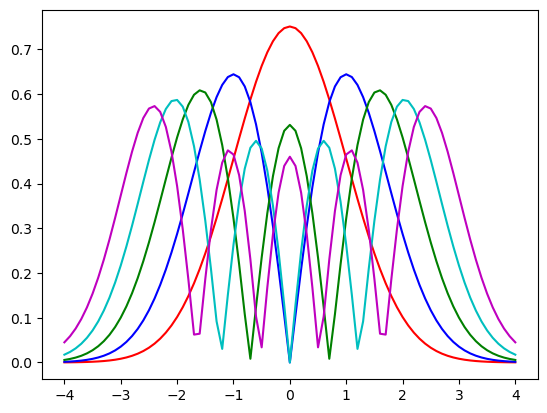

In [45]:
for mode in range(1, 6):
    beta = beta_start 
    dbeta = 0.2
    for _ in range(1000):  
        phi0 = [1, np.sqrt(L**2 - beta)]
        y = odeint(harmonic_shoot, phi0, x_range, args=(beta,))

        phi_guess = y[-1, 1] + np.sqrt(L**2-beta)*y[-1,0]
        if abs(phi_guess) < tol:  
            print(f"Eigenvalue for mode {mode}: {beta} with value of x and y as ({x_range[-1]}, {y[-1,0]})")
            A2.append(beta)
            break
        
        if (-1) ** (mode+1) * (phi_guess) > 0:
            beta += dbeta
        else:
            beta -= dbeta / 2
            dbeta /= 2
    
    norm = np.trapz(y[:, 0] ** 2, x_range)
    normalized_eigenfunction = abs(y[:, 0]) / np.sqrt(norm)
    # display(len(normalized_eigenfunction))
    A1.append(normalized_eigenfunction)
    plt.plot(x_range, normalized_eigenfunction, colors [mode-1], label=f'Mode {mode-1}')
    
    beta_start = beta + 0.2


In [46]:
A1 = np.column_stack(A1)
print(A1.shape)
print(A1[1,2])
print(A1)


(81, 5)
0.007886957169791806
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588478e-02
  4.50516634e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399844e-02
  5.86293757e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484043e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281013e-02
  9.71899167e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080911e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653865e-02
  1.53831247e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559870e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113256e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981570e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220561e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518000e-01]
 [1.4903259

In [47]:
A2 = np.array(A2)
display(A2)

array([0.99999998, 2.9999994 , 4.99998953, 6.9998832 , 8.99906075])

In [48]:
np.save("A1.npy", A1)
np.save("A2.npy", A2)